In this notebook, I am going to plot some chart on the cleaned scrapped california vaccine data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
ca=pd.read_csv('../clean_data/scrapped_ca_vaccine.csv')

In [3]:
ca_1=pd.melt(ca[['date','total_doses_distributed','total_doses_administered']],\
       id_vars='date',var_name='dis_adm',value_name='doses')
ca_1.head(1)

,date,dis_adm,doses
0,2021-01-16,total_doses_distributed,3548575


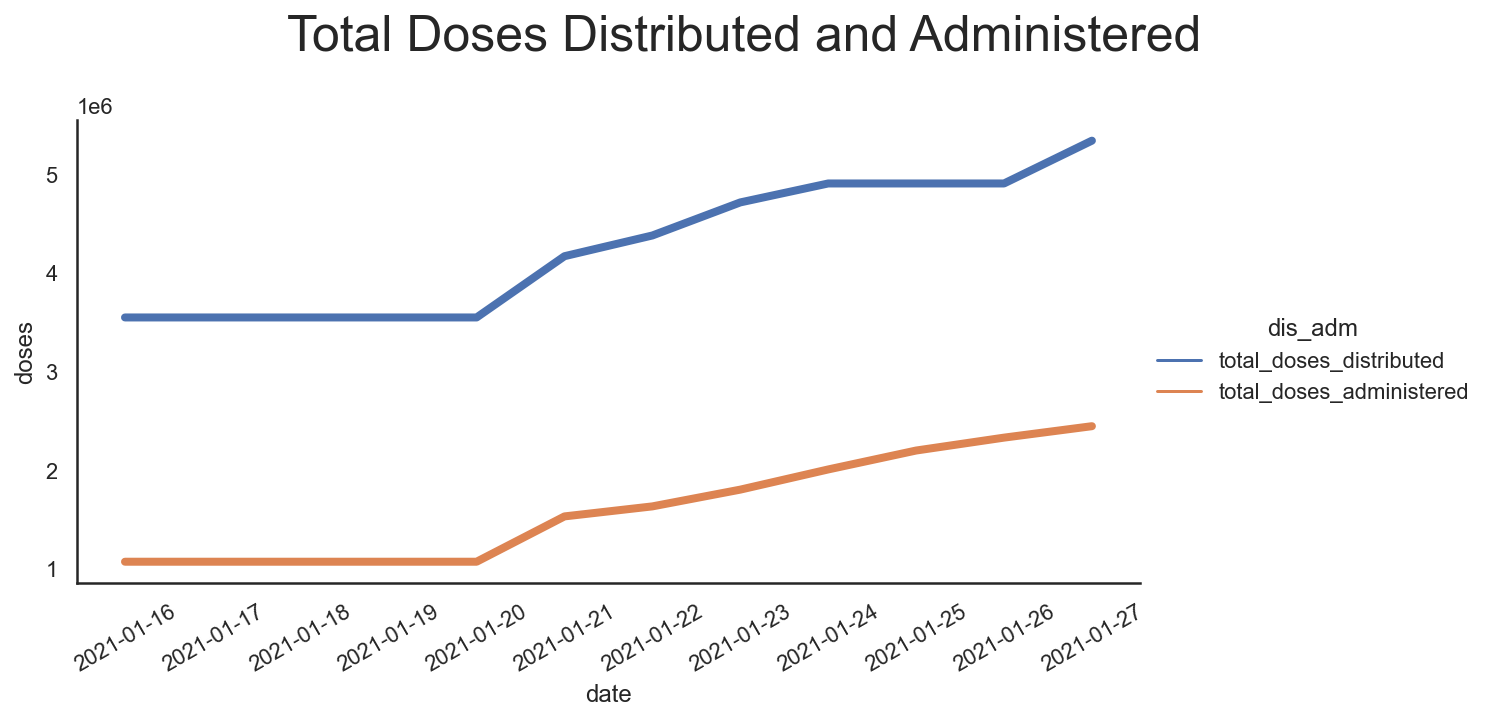

In [4]:
sns.set(style='white')
g=sns.relplot(x='date',y='doses',data=ca_1,kind='line',hue='dis_adm',height=4,
              aspect=2,linewidth = 4)
g.fig.suptitle("Total Doses Distributed and Administered",size=25,y=1.1)
g.set_xticklabels(rotation=30);

In [5]:
ca_2=pd.melt(ca[['date','total_doses_distributed','total_doses_administered','daily_change_dist','daily_change_admin']],\
       id_vars='date',var_name='dis_adm',value_name='doses')
ca_2.head(1)

,date,dis_adm,doses
0,2021-01-16,total_doses_distributed,3548575.0


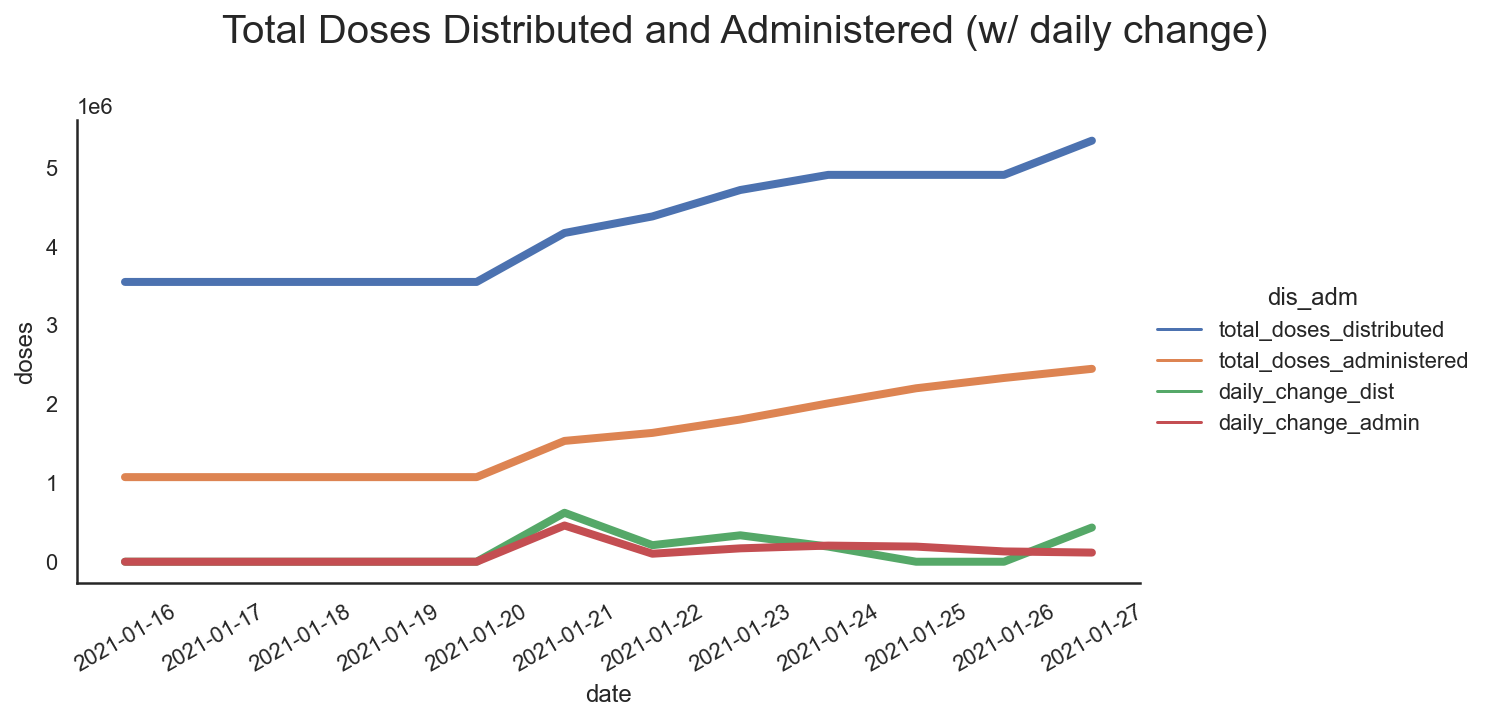

In [7]:
sns.set(style='white')
g=sns.relplot(x='date',y='doses',data=ca_2,kind='line',hue='dis_adm',height=4,
              aspect=2,linewidth = 4)
g.fig.suptitle("Total Doses Distributed and Administered (w/ daily change)",size=20,y=1.1)
g.set_xticklabels(rotation=30)
g.savefig('California_doses_distributed_administered');

In [8]:
ca_3=pd.melt(ca[['date','doses_distributed_100k','dist_100k_change','doses_administed_100k','admin_100k_change']],\
       id_vars='date',var_name='dis_adm_100',value_name='doses')
ca_3.head(1)

,date,dis_adm_100,doses
0,2021-01-16,doses_distributed_100k,8981.0


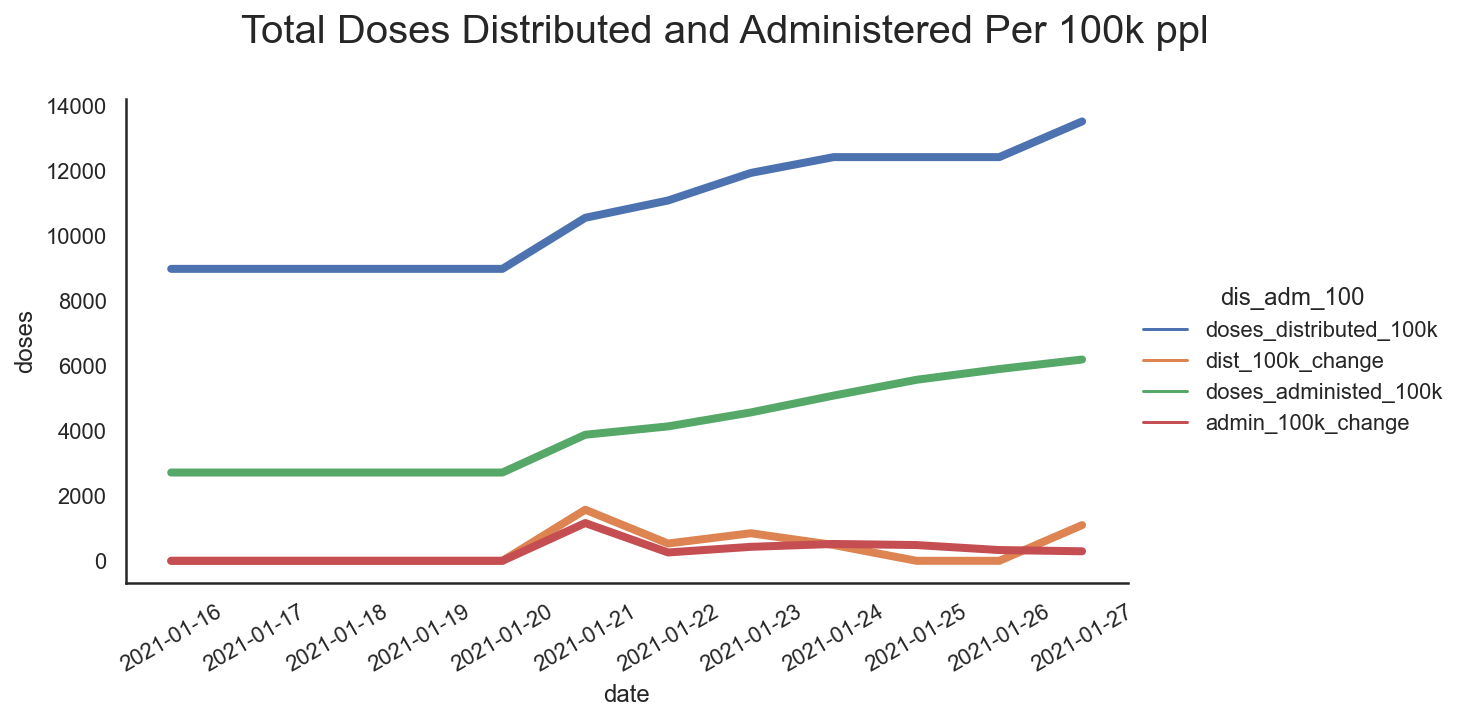

In [9]:
sns.set(style='white')
g=sns.relplot(x='date',y='doses',data=ca_3,kind='line',hue='dis_adm_100',height=4,
              aspect=2,linewidth = 4)
g.fig.suptitle("Total Doses Distributed and Administered Per 100k ppl",size=20,y=1.1)
g.set_xticklabels(rotation=30);

# this looks the same as the total doses distributed and administered, which makes sense,
# cause it's just scaled with 100k ppl

In [10]:
ca.head(1)

,state,date,total_doses_distributed,daily_change_dist,total_doses_administered,daily_change_admin,doses_distributed_100k,dist_100k_change,doses_administed_100k,admin_100k_change,people_1+_dose,people_1+_dose_change,doses_1+_100k,doses_1+_100k_change,people_2_doses,people_2_doses_change,doses_2_100k,doses_2_100k_change
0,California,2021-01-16,3548575,0.0,1072959,0.0,8981.0,0.0,2716.0,0.0,865387,0.0,2190.0,0.0,204374,0.0,204374,0.0


In [11]:
ca_4=pd.melt(ca[['date','people_1+_dose','people_1+_dose_change','people_2_doses','people_2_doses_change']],\
       id_vars='date',var_name='ppl_dose',value_name='doses')
ca_4.head(1)

,date,ppl_dose,doses
0,2021-01-16,people_1+_dose,865387.0


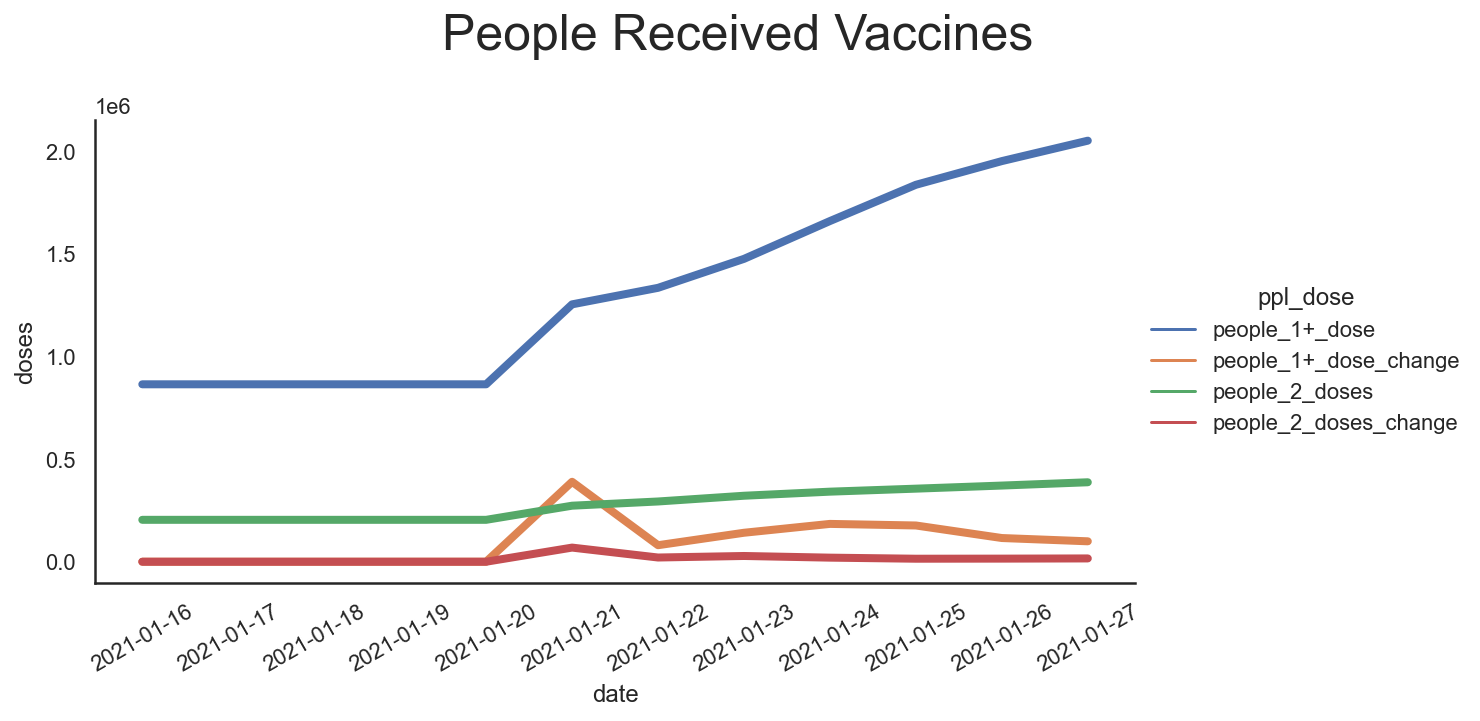

In [12]:
sns.set(style='white')
g=sns.relplot(x='date',y='doses',data=ca_4,kind='line',hue='ppl_dose',height=4, aspect=2,
             linewidth = 4)
g.fig.suptitle("People Received Vaccines",size=25,y=1.1)
g.set_xticklabels(rotation=30);

# the increase of people who receiving 1 or more doses peaked on 01/21, but decreased after that